<a href="https://colab.research.google.com/github/GNC0610/INYRN-2025-1925361/blob/main/AF8_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 8: Redes Neuronales Artificiales Convolucionales**


*   1799047 Eva Melissa Aguilar Frayre N4
*   2045431 Carlos Eduardo Reyes Rodríguez N4
*   2054276 Megan Johana Hernández Jasso N4
*   2049765 Daena victoria Santiago del Ángel N4
*   1925361 Guillermo Niño Camacho N4



1.Carga de las librerias a utilizar en la Actividad 8:

In [2]:
# Carga de librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

2.Cargamos los datos de MNIST:

In [3]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


3.Normalizar los datos a trabajar:

In [4]:
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

4.Redimension de imagenes:

In [5]:
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

5.Conversion de etiquetas:

In [6]:
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

6.Creacion del modelo:

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7.Compilacion del modelo:

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

8.Entrenamiento del modelo:

In [9]:
model.fit(train_data, train_labels_cat, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.8772 - loss: 0.4132 - val_accuracy: 0.9833 - val_loss: 0.0569
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9821 - loss: 0.0576 - val_accuracy: 0.9863 - val_loss: 0.0456
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9871 - loss: 0.0405 - val_accuracy: 0.9890 - val_loss: 0.0383
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.9902 - loss: 0.0292 - val_accuracy: 0.9873 - val_loss: 0.0430
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9924 - loss: 0.0239 - val_accuracy: 0.9888 - val_loss: 0.0377


9.Evaluacion del modelo entrenado:

In [10]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels_cat)
print(f"\n Exactitud en el conjunto de prueba: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9871 - loss: 0.0365

 Exactitud en el conjunto de prueba: 0.9898


10.Tamaño del modelo:

In [12]:
print("\n Resumen del modelo:")
model.summary()


 Resumen del modelo:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

11.Predicciones del modelo:

In [13]:
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step



 Ejemplos de predicciones:


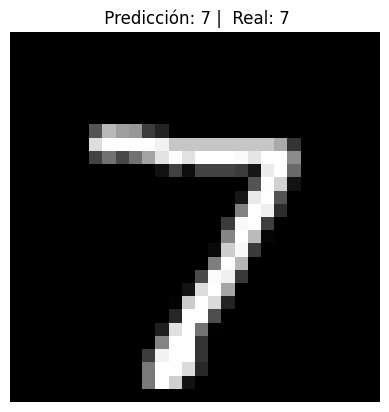

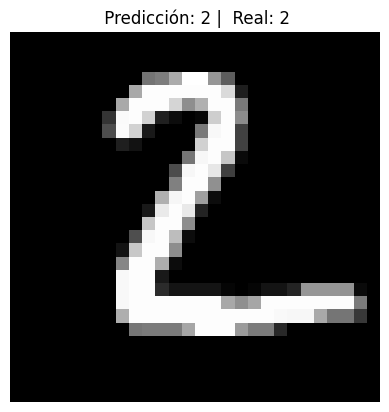

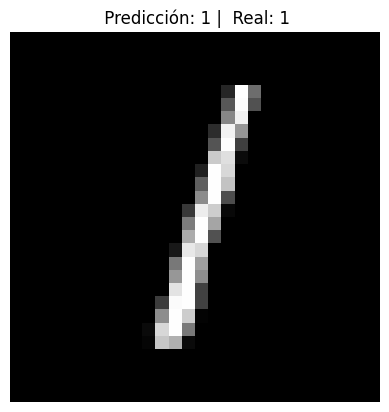

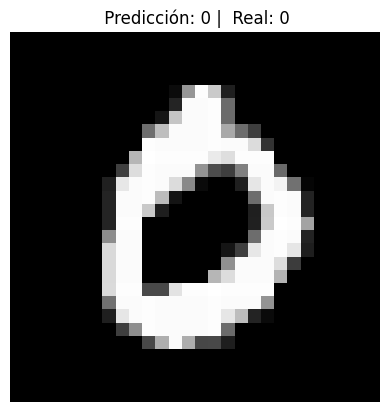

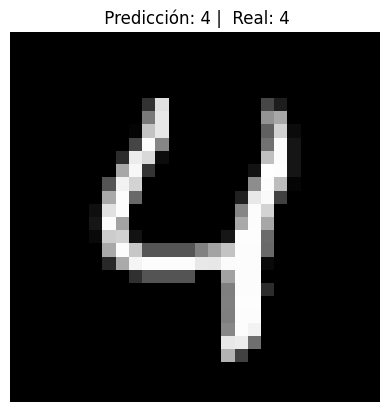

In [15]:
print("\n Ejemplos de predicciones:")
for i in range(5):
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f" Predicción: {predicted_classes[i]} |  Real: {test_labels[i]}")
    plt.axis('off')
    plt.show()

12.Matriz de Confusion del modelo:

<Figure size 1000x800 with 0 Axes>

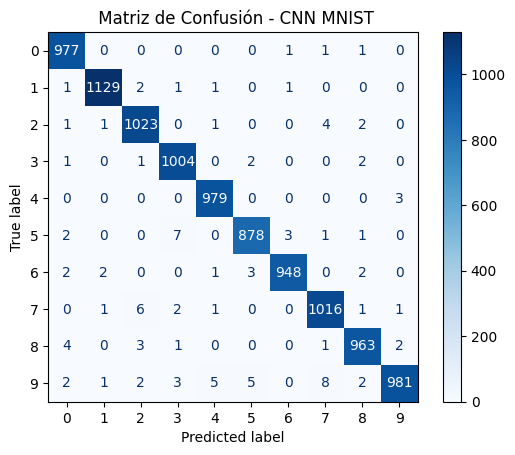

In [17]:
cm = confusion_matrix(test_labels, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title(" Matriz de Confusión - CNN MNIST")
plt.show()

13.Reporte de Clasificación:

In [18]:
print("\n Reporte de clasificación:\n")
print(classification_report(test_labels, predicted_classes))


 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

